<a href="https://colab.research.google.com/github/pierre-brendan/PelotonIQ/blob/master/rider_cluserting/rider_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rider Clustering

In [0]:
## install the packages I need for this
# !pip install sklearn

In [0]:
# Mount drive to get cyclist links
from google.colab import drive
drive.mount('/content/drive')

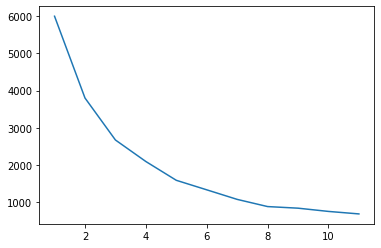

In [2]:
# load modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

# load the data
cycling_data = pd.read_csv('/content/drive/My Drive/cycling_data/rider_data.csv')

# make a df without cyclist name in it for clustering
cycling_data.head()
d = cycling_data.drop(['Rider', 'Team', 'crawl_date'], axis=1)

# let's normalize the data
d['GC'] = preprocessing.scale(d['GC'])
d['Sprint'] = preprocessing.scale(d['Sprint'])
d['TT'] = preprocessing.scale(d['TT'])
d['Climber'] = preprocessing.scale(d['Climber'])
d['Classic'] = preprocessing.scale(d['Classic'])

# let's go with 8 clusters to start
m = KMeans(8)
m.fit(d)

# Add to our data frame
d['Cluster'] = m.labels_

# join back to original data set on index
cycling_data2 = pd.merge(cycling_data, d, left_index=True, right_index=True)

# Review the data
#cycling_data2.head()

# Total errors and # of clusters
dist_points_from_cluster_center = []
K = range(1,12)
for no_of_clusters in K:
  k_model = KMeans(n_clusters=no_of_clusters)
  k_model.fit(d)
  dist_points_from_cluster_center.append(k_model.inertia_)
plt.plot(K, dist_points_from_cluster_center)
# 8 seems solid


In [6]:
# Let's roll up the avg of of each attribute to see what the clusters made
#cycling_data2.head()
cycling_data2.groupby(['Cluster']).mean() # may need to add age to data set

,GC_x,TT_x,Sprint_x,Climber_x,Classic_x,GC_y,TT_y,Sprint_y,Climber_y,Classic_y
Cluster,,,,,,,,,,
0,509.544554,182.534653,2020.108911,250.297030,1103.930693,-0.159945,-0.203661,0.849539,-0.242244,0.435517
1,5677.411765,1722.117647,918.705882,5319.352941,2162.294118,4.345341,2.039979,0.067402,4.358340,1.379310
2,1025.750000,415.785714,4820.107143,717.500000,3240.178571,0.290077,0.136257,2.837895,0.181781,2.340510
3,2363.760000,2944.080000,707.080000,1262.360000,690.600000,1.456538,3.820750,-0.082879,0.676286,0.066930
4,299.014210,149.847247,334.928952,179.474245,214.476021,-0.343483,-0.251296,-0.347154,-0.306522,-0.357652
5,12065.000000,4575.000000,5474.000000,13660.000000,11684.000000,9.913967,6.197495,3.302242,11.928163,9.870267
6,2098.133333,532.516667,625.883333,2006.716667,999.083333,1.224968,0.306370,-0.140539,1.351851,0.342019
7,2463.400000,796.600000,11030.200000,2260.400000,8762.200000,1.543403,0.691219,7.247852,1.582089,7.264759
